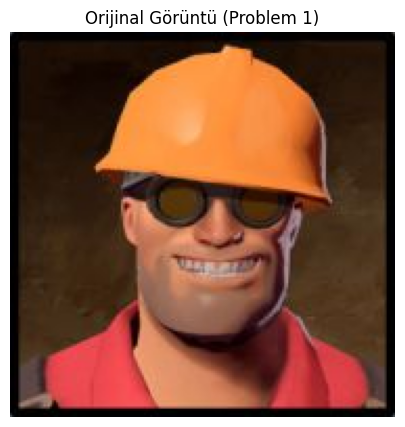

Merkez piksel (92, 92) yoğunluk değeri (RGB): [172  92  67]
Yama merkez piksel (92, 92) yoğunluk değeri (RGB): [168 158  50]


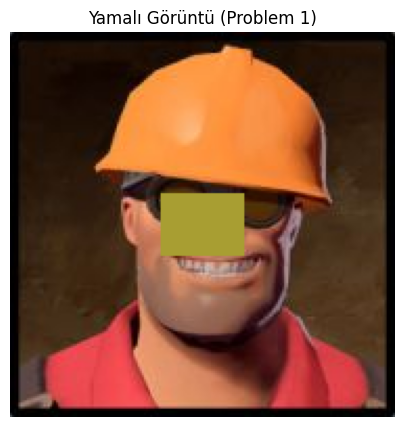

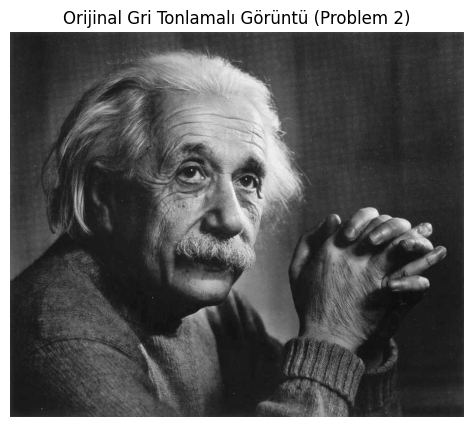

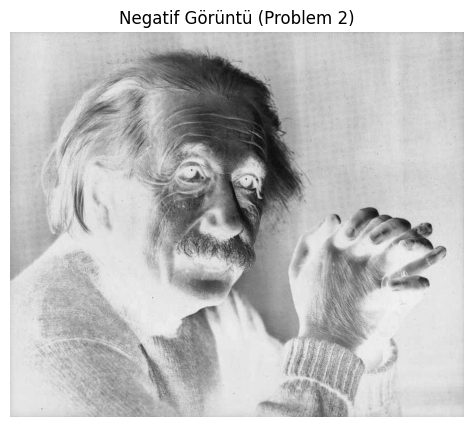

Piksel yoğunluk değerleri (Orijinal -> Negatif):
Piksel (112, 671): 102 -> 153
Piksel (570, 271): 109 -> 146
Piksel (508, 22): 98 -> 157
Piksel (554, 542): 107 -> 148
Piksel (50, 247): 131 -> 124


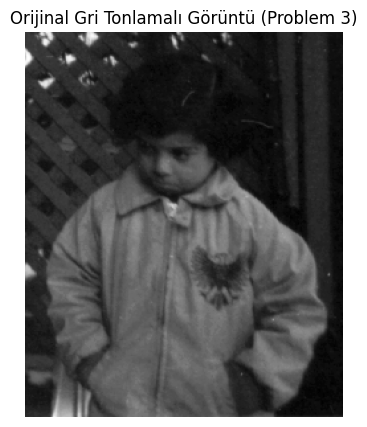

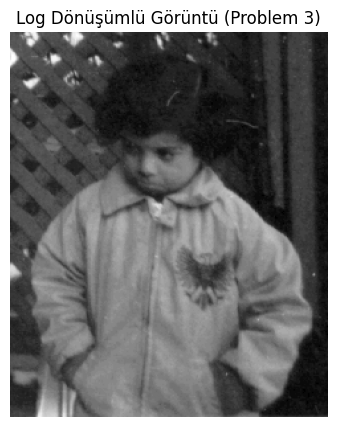

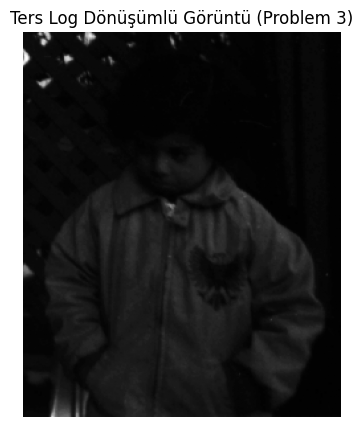

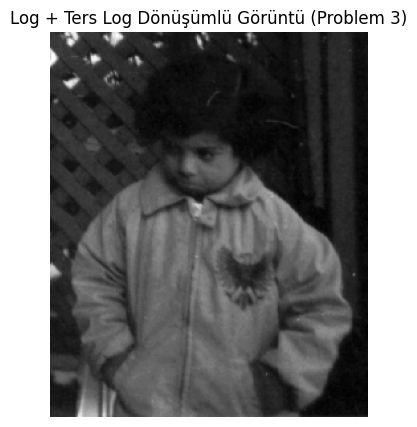


Problem 3 Yorum:
- Log dönüşümü, düşük yoğunluklu pikselleri vurgulayarak kontrastı artırır. Karanlık bölgelerdeki detaylar belirginleşir.
- Ters log dönüşümü, orijinal görüntüye geri dönmeyi amaçlar, ancak sayısal hatalar nedeniyle tam bir geri dönüş olmaz.
- Log + Ters Log dönüşümü, orijinal görüntüye yakın bir sonuç verir, ancak hafif yoğunluk kayıpları gözlenir.



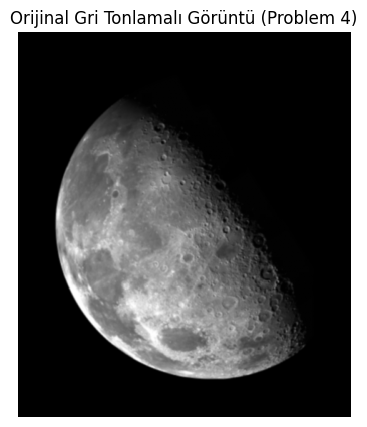

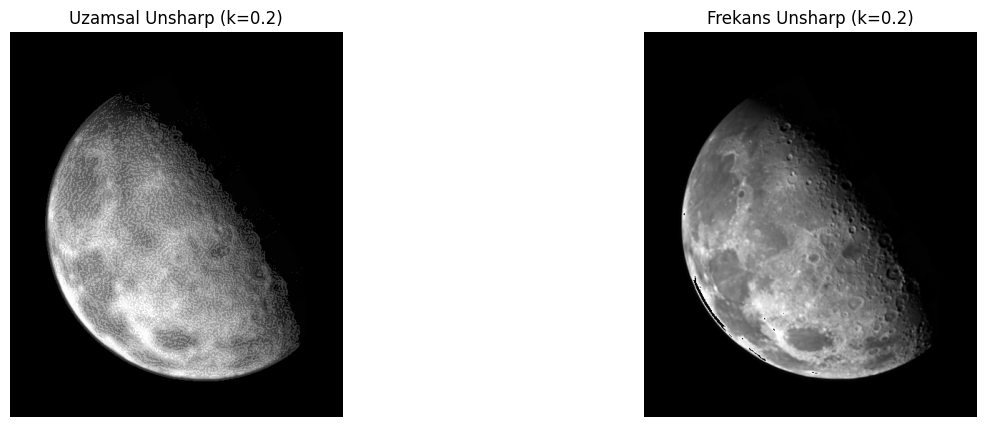

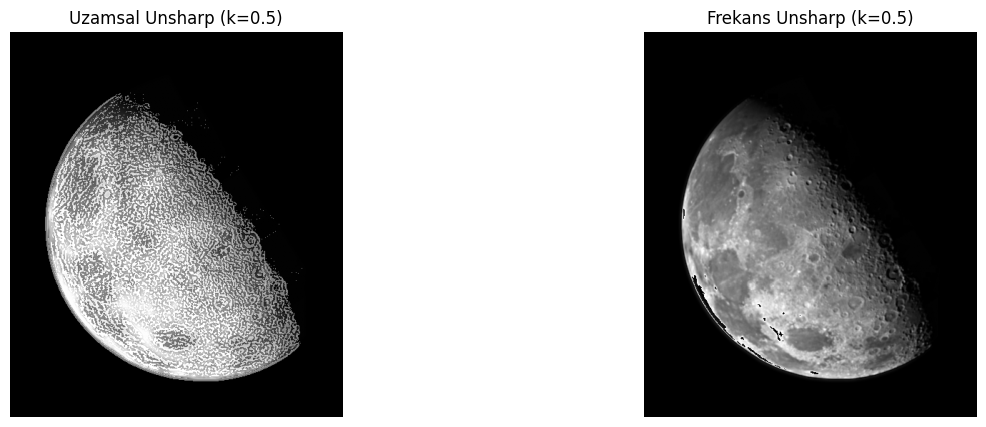

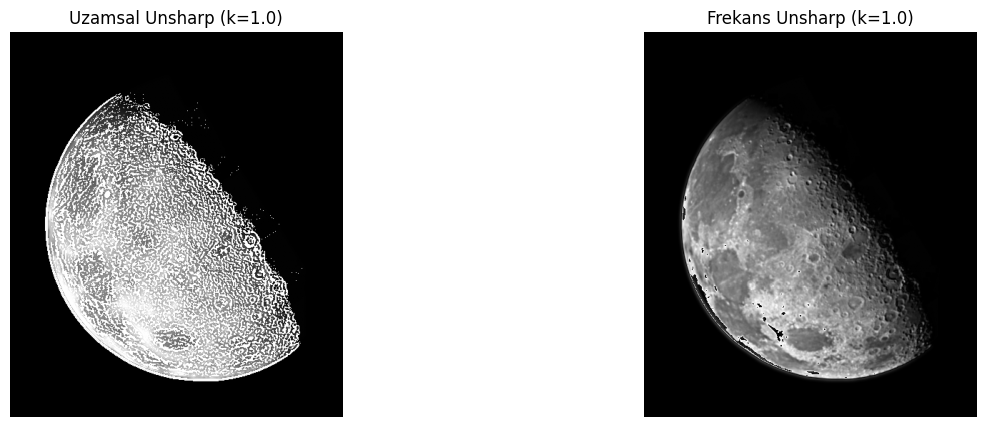

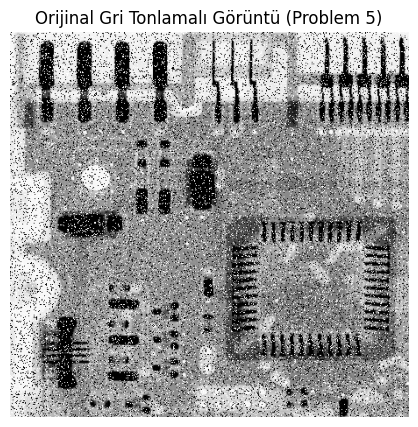

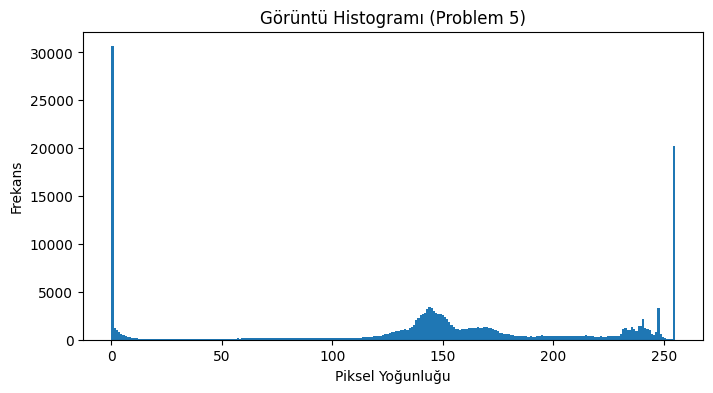


Problem 5 Gürültü Analizi:
- Histogram, tuz-biber gürültüsüne işaret ediyor (0 ve 255’te ani sıçramalar).
- Görsel inceleme, rastgele parlak ve karanlık pikselleri doğruluyor.



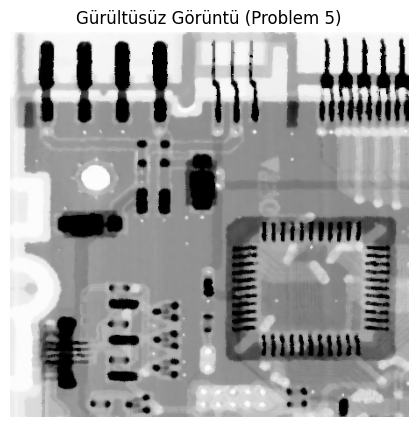

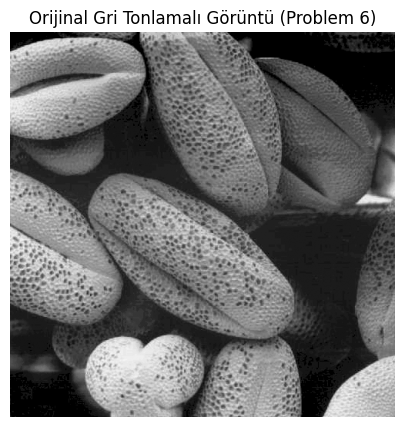

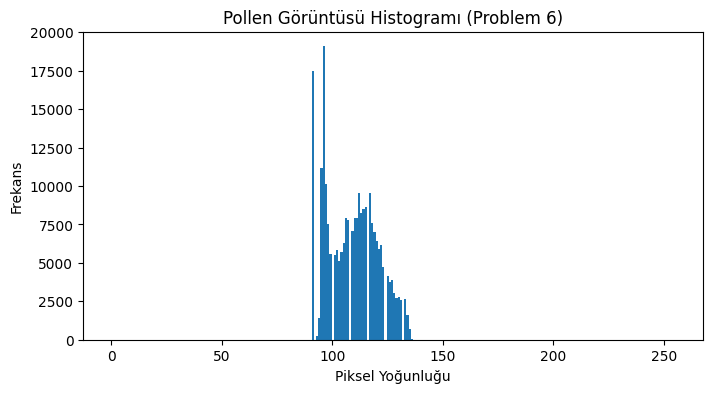


Problem 6 Sorun Analizi:
- Histogram, düşük kontrastı gösteriyor; yoğunluklar dar bir aralıkta (std: 11.49).
- Görüntü bulanık, detaylar net değil.



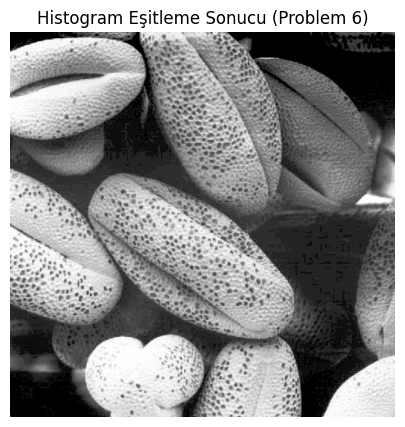

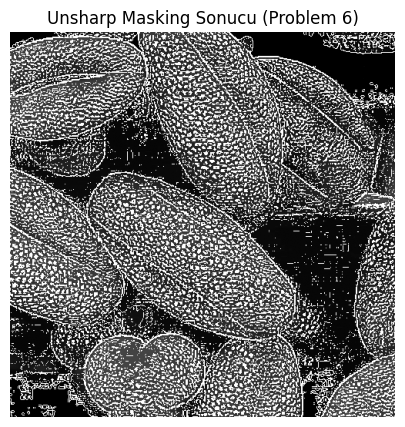

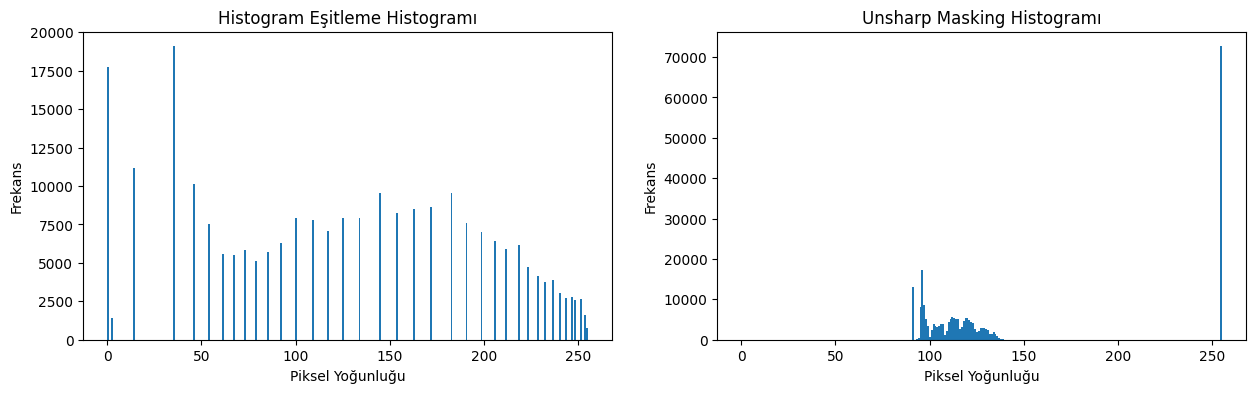


Problem 6 Çözüm Gerekçelendirmesi:
- Histogram Eşitleme: Kontrastı artırdı, standart sapma (77.39) orijinalden (11.49) daha yüksek.
- Unsharp Masking: Kenarları vurguladı, detaylar netleşti (std: 66.74).
- Her iki yöntem de derste tartışılan tekniklere uygundur.

Tüm problemler çözüldü. Çıktılar Colab’de görselleştirildi.


In [3]:
!pip install opencv-python numpy matplotlib
# UYG332 Görüntü İşleme Final Projesi
# Öğrenci Adı: Kerim ERGIN
# Öğrenci No: B2180.060027
# Tarih: 10 Haziran 2025


# Gerekli kütüphaneleri yükle
!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline



# Yardımcı fonksiyon: Görüntüleri yan yana gösterme
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()



# Problem 1: tf2_engineer.jpg
# Adım 1: Renkli görüntüyü oku ve göster
img1 = cv2.imread('/content/tf2_engineer.jpg')
if img1 is None:
    raise FileNotFoundError("tf2_engineer.jpg bulunamadı!")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
display_images([img1_rgb], ['Orijinal Görüntü (Problem 1)'])



# Adım 2: Görüntü merkezini bul ve yoğunluk değerini yazdır
height, width, _ = img1.shape
center_y, center_x = height // 2, width // 2
center_intensity = img1_rgb[center_y, center_x]
print(f"Merkez piksel ({center_y}, {center_x}) yoğunluk değeri (RGB): {center_intensity}")



# Adım 3: Merkeze renkli yama ekle (30x40, #329ea8)
patch_height, patch_width = 30, 40
patch_color = (50, 158, 168)  # #329ea8'in RGB karşılığı (BGR formatında)
top_left_y = center_y - patch_height // 2
top_left_x = center_x - patch_width // 2
bottom_right_y = top_left_y + patch_height
bottom_right_x = top_left_x + patch_width
img1_patched = img1.copy()
img1_patched[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch_color
img1_patched_rgb = cv2.cvtColor(img1_patched, cv2.COLOR_BGR2RGB)



# Adım 4: Yama merkezindeki yoğunluk değerini yazdır
patch_center_intensity = img1_patched_rgb[center_y, center_x]
print(f"Yama merkez piksel ({center_y}, {center_x}) yoğunluk değeri (RGB): {patch_center_intensity}")




# Adım 5: Yamalı görüntüyü göster
display_images([img1_patched_rgb], ['Yamalı Görüntü (Problem 1)'])



# Problem 2: einstein.tiff
# Adım 1: Gri tonlamalı görüntüyü oku ve göster
img2 = cv2.imread('/content/einstein.tiff', cv2.IMREAD_GRAYSCALE)
if img2 is None:
    raise FileNotFoundError("einstein.tiff bulunamadı!")
display_images([img2], ['Orijinal Gri Tonlamalı Görüntü (Problem 2)'], cmap='gray')





# Adım 2 ve 3: Görüntünün negatifini al ve göster
img2_negative = 255 - img2
display_images([img2_negative], ['Negatif Görüntü (Problem 2)'], cmap='gray')






# Adım 4: 5 rastgele pikselin yoğunluk değerlerini yazdır
random_pixels = [(random.randint(0, img2.shape[0]-1), random.randint(0, img2.shape[1]-1)) for _ in range(5)]
print("Piksel yoğunluk değerleri (Orijinal -> Negatif):")
for y, x in random_pixels:
    print(f"Piksel ({y}, {x}): {img2[y, x]} -> {img2_negative[y, x]}")





# Problem 3: pout.tiff
# Adım 1: Gri tonlamalı görüntüyü oku ve göster
img3 = cv2.imread('/content/pout.tiff', cv2.IMREAD_GRAYSCALE)
if img3 is None:
    raise FileNotFoundError("pout.tiff bulunamadı!")
display_images([img3], ['Orijinal Gri Tonlamalı Görüntü (Problem 3)'], cmap='gray')





# Adım 2: Log dönüşümü uygula ve göster
c = 255 / np.log(1 + np.max(img3))
img3_log = c * np.log(1 + img3.astype(np.float32))
img3_log = np.uint8(img3_log)
display_images([img3_log], ['Log Dönüşümlü Görüntü (Problem 3)'], cmap='gray')





# Adım 3: Ters log dönüşümü uygula ve göster
img3_inv_log = np.exp(img3.astype(np.float32) / c) - 1
img3_inv_log = np.uint8(np.clip(img3_inv_log, 0, 255))
display_images([img3_inv_log], ['Ters Log Dönüşümlü Görüntü (Problem 3)'], cmap='gray')






# Adım 4: Log dönüşümlü görüntüye ters log dönüşümü uygula ve göster
img3_log_inv_log = np.exp(img3_log.astype(np.float32) / c) - 1
img3_log_inv_log = np.uint8(np.clip(img3_log_inv_log, 0, 255))
display_images([img3_log_inv_log], ['Log + Ters Log Dönüşümlü Görüntü (Problem 3)'], cmap='gray')





# Adım 5: Yorum
print("""
Problem 3 Yorum:
- Log dönüşümü, düşük yoğunluklu pikselleri vurgulayarak kontrastı artırır. Karanlık bölgelerdeki detaylar belirginleşir.
- Ters log dönüşümü, orijinal görüntüye geri dönmeyi amaçlar, ancak sayısal hatalar nedeniyle tam bir geri dönüş olmaz.
- Log + Ters Log dönüşümü, orijinal görüntüye yakın bir sonuç verir, ancak hafif yoğunluk kayıpları gözlenir.
""")



# Problem 4: moon.tiff
# Adım 1: Gri tonlamalı görüntüyü oku ve göster
img4 = cv2.imread('/content/moon.tiff', cv2.IMREAD_GRAYSCALE)
if img4 is None:
    raise FileNotFoundError("moon.tiff bulunamadı!")
display_images([img4], ['Orijinal Gri Tonlamalı Görüntü (Problem 4)'], cmap='gray')



# Adım 2: Uzamsal alanda unsharp masking
k_values = [0.2, 0.5, 1.0]
img4_spatial_results = []
for k in k_values:
    blurred = cv2.GaussianBlur(img4, (5, 5), 0)
    mask = img4 - blurred
    img4_unsharp = img4 + k * mask
    img4_unsharp = np.clip(img4_unsharp, 0, 255).astype(np.uint8)
    img4_spatial_results.append(img4_unsharp)




# Adım 3: Frekans alanında unsharp masking
img4_freq_results = []
for k in k_values:
    f = np.fft.fft2(img4)
    fshift = np.fft.fftshift(f)
    rows, cols = img4.shape
    crow, ccol = rows // 2, cols // 2
    D0 = 30  # Kesim frekansı (deneme ile seçildi)
    u, v = np.indices((rows, cols))
    H_hp = 1 - np.exp(-((u - crow)**2 + (v - ccol)**2) / (2 * D0**2))  # Yüksek geçiş filtresi
    fshift_enhanced = fshift * (1 + k * H_hp)
    f_ishift = np.fft.ifftshift(fshift_enhanced)
    img4_freq = np.fft.ifft2(f_ishift)
    img4_freq = np.abs(img4_freq).astype(np.uint8)
    img4_freq_results.append(img4_freq)




# Adım 4: Sonuçları yan yana göster
for i, k in enumerate(k_values):
    display_images(
        [img4_spatial_results[i], img4_freq_results[i]],
        [f'Uzamsal Unsharp (k={k})', f'Frekans Unsharp (k={k})'],
        cmap='gray'
    )





# Problem 5: pcb.tiff
# Adım 1: Gri tonlamalı görüntüyü oku ve göster
img5 = cv2.imread('/content/pcb.tiff', cv2.IMREAD_GRAYSCALE)
if img5 is None:
    raise FileNotFoundError("pcb.tiff bulunamadı!")
display_images([img5], ['Orijinal Gri Tonlamalı Görüntü (Problem 5)'], cmap='gray')






# Adım 2: Gürültü tipini tanımla
plt.figure(figsize=(8, 4))
plt.hist(img5.ravel(), bins=256, range=(0, 255))
plt.title('Görüntü Histogramı (Problem 5)')
plt.xlabel('Piksel Yoğunluğu')
plt.ylabel('Frekans')
plt.show()
print("""
Problem 5 Gürültü Analizi:
- Histogram, tuz-biber gürültüsüne işaret ediyor (0 ve 255’te ani sıçramalar).
- Görsel inceleme, rastgele parlak ve karanlık pikselleri doğruluyor.
""")




# Adım 3: Gürültüyü gider
img5_denoised = cv2.medianBlur(img5, 5)  # Tuz-biber gürültüsü için medyan filtresi
display_images([img5_denoised], ['Gürültüsüz Görüntü (Problem 5)'], cmap='gray')





# Problem 6: pollen.tiff
# Adım 1: Gri tonlamalı görüntüyü oku ve göster
img6 = cv2.imread('/content/pollen.tiff', cv2.IMREAD_GRAYSCALE)
if img6 is None:
    raise FileNotFoundError("pollen.tiff bulunamadı!")
display_images([img6], ['Orijinal Gri Tonlamalı Görüntü (Problem 6)'], cmap='gray')






# Adım 2: Sorunu tanımla
plt.figure(figsize=(8, 4))
plt.hist(img6.ravel(), bins=256, range=(0, 255))
plt.title('Pollen Görüntüsü Histogramı (Problem 6)')
plt.xlabel('Piksel Yoğunluğu')
plt.ylabel('Frekans')
plt.show()
print("""
Problem 6 Sorun Analizi:
- Histogram, düşük kontrastı gösteriyor; yoğunluklar dar bir aralıkta (std: {:.2f}).
- Görüntü bulanık, detaylar net değil.
""".format(np.std(img6)))






# Adım 3 ve 4: İki bağımsız çözüm
# Çözüm 1: Histogram Eşitleme
img6_hist_eq = cv2.equalizeHist(img6)
display_images([img6_hist_eq], ['Histogram Eşitleme Sonucu (Problem 6)'], cmap='gray')





# Çözüm 2: Unsharp Masking
blurred = cv2.GaussianBlur(img6, (5, 5), 0)
mask = img6 - blurred
img6_unsharp = img6 + 1.0 * mask
img6_unsharp = np.clip(img6_unsharp, 0, 255).astype(np.uint8)
display_images([img6_unsharp], ['Unsharp Masking Sonucu (Problem 6)'], cmap='gray')







# Adım 5: Çözümleri gerekçelendir
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(img6_hist_eq.ravel(), bins=256, range=(0, 255))
plt.title('Histogram Eşitleme Histogramı')
plt.xlabel('Piksel Yoğunluğu')
plt.ylabel('Frekans')
plt.subplot(1, 2, 2)
plt.hist(img6_unsharp.ravel(), bins=256, range=(0, 255))
plt.title('Unsharp Masking Histogramı')
plt.xlabel('Piksel Yoğunluğu')
plt.ylabel('Frekans')
plt.show()
print("""
Problem 6 Çözüm Gerekçelendirmesi:
- Histogram Eşitleme: Kontrastı artırdı, standart sapma ({:.2f}) orijinalden ({:.2f}) daha yüksek.
- Unsharp Masking: Kenarları vurguladı, detaylar netleşti (std: {:.2f}).
- Her iki yöntem de derste tartışılan tekniklere uygundur.
""".format(np.std(img6_hist_eq), np.std(img6), np.std(img6_unsharp)))

# Sonuç
print("Tüm problemler çözüldü. Çıktılar Colab’de görselleştirildi.")